<a href="https://colab.research.google.com/github/anuskhattak/ML-Project/blob/main/Mall_Customer_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.rename(columns={'Genre':'Gender'},inplace=True)
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [ ]:
df.shape

(200, 5)

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


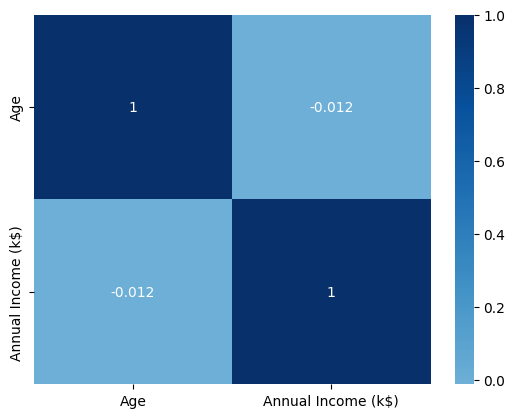

In [ ]:
corr = df[['Age','Annual Income (k$)']].corr()
sns.heatmap(corr, annot=True, cmap='Blues',center=0)
plt.show()

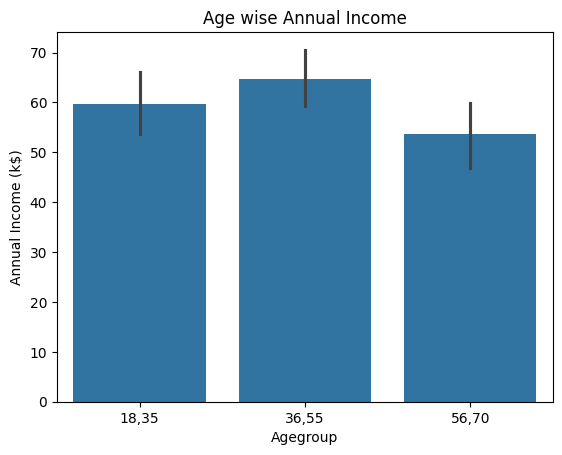

In [ ]:
df['Agegroup'] = pd.cut(df['Age'], bins=[18,35,55,70], labels=['18,35', '36,55', '56,70'])
sns.barplot(x='Agegroup', y='Annual Income (k$)', data=df)
plt.title('Age wise Annual Income')
plt.show()

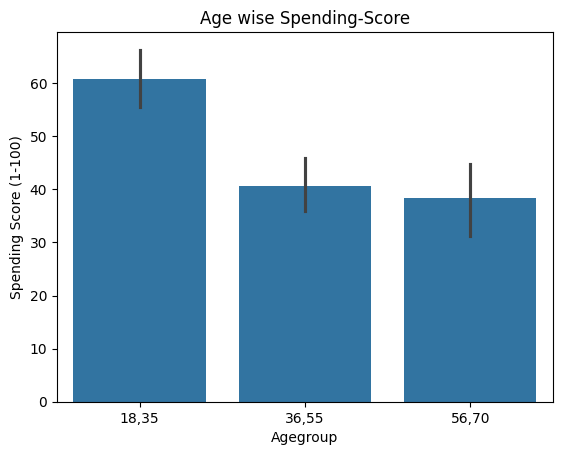

In [ ]:
df['Agegroup'] = pd.cut(df['Age'], bins=[18,35,55,70], labels=['18,35', '36,55', '56,70'])
sns.barplot(x='Agegroup', y='Spending Score (1-100)', data=df)
plt.title('Age wise Spending-Score')
plt.show()

In [ ]:
df.head(1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Agegroup
0,1,Male,19,15,39,"18,35"


# **Data Scaling**

In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [ ]:
scale = StandardScaler()
X_scales = scale.fit_transform(X)

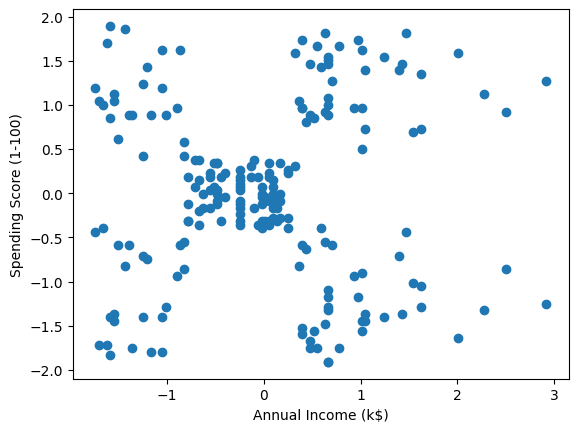

In [ ]:

plt.scatter(X_scales[:,0], X_scales[:,1])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
elb = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
  kmeans.fit(X_scales)
  elb.append(kmeans.inertia_)

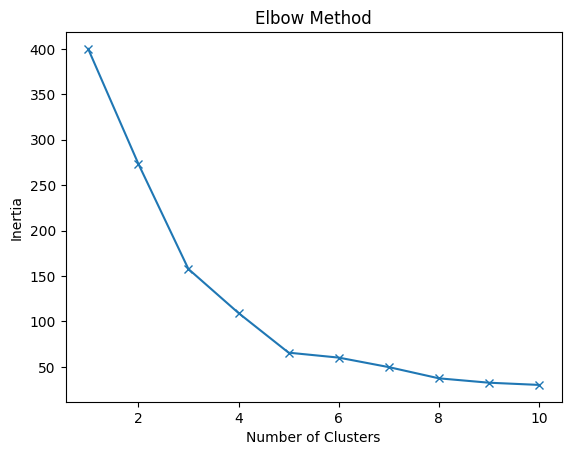

In [ ]:
plt.plot(range(1,11),elb, marker='x')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
k=5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scales)
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

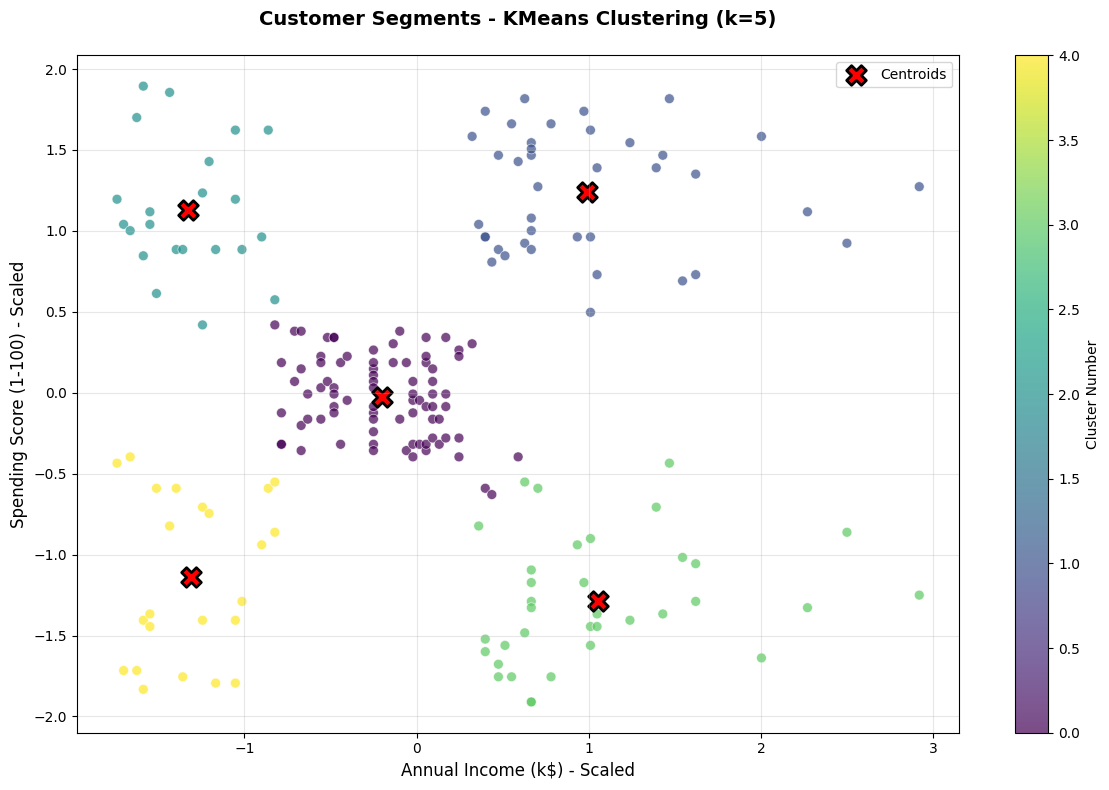

In [ ]:
# Scaled data ke saath visualization
plt.figure(figsize=(12, 8))

# Scatter plot with cluster colors
scatter = plt.scatter(X_scales[:, 0], X_scales[:, 1], c=y_kmeans, cmap='viridis',
                      alpha=0.7, s=50, edgecolors='w', linewidth=0.5)

# Cluster centers (centroids)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200,
            label='Centroids', edgecolors='black', linewidth=2)

# Labels and title
plt.xlabel('Annual Income (k$) - Scaled', fontsize=12)
plt.ylabel('Spending Score (1-100) - Scaled', fontsize=12)
plt.title('Customer Segments - KMeans Clustering (k=5)\n', fontsize=14, fontweight='bold')

# Colorbar for clusters
plt.colorbar(scatter, label='Cluster Number')

# Legend and grid
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
df['Cluster'] = y_kmeans

In [ ]:
cluster_analysis = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
print(cluster_analysis)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                     55.30                   49.52
1                     86.54                   82.13
2                     25.73                   79.36
3                     88.20                   17.11
4                     26.30                   20.91


In [ ]:
def assign_persona(row):
   income = row['Annual Income (k$)']
   spending = row['Spending Score (1-100)']

   high_income = income > 70
   low_income = income < 40
   medium_income = (income >= 40) & (income <= 70)
   high_spending = spending > 60
   low_spending = spending < 40
   medium_spending = (spending >= 40) & (spending <= 60)

   if high_income and high_spending:
        return "Premium Customers"
   elif high_income and low_spending:
        return "Potential Loyal Customers"
   elif high_income and medium_spending:
        return "Selective Spenders"
   elif medium_income and high_spending:
        return "Value Seekers"
   elif medium_income and low_spending:
        return "Budget Conscious"
   elif low_income and high_spending:
        return "Impulse Buyers"
   elif low_income and low_spending:
        return "Conservative Shoppers"
   else:
        return "Average Customers"

In [ ]:
cluster_personas = cluster_analysis.apply(assign_persona, axis=1)
print("\nCluster Personas:")
print(cluster_personas)


Cluster Personas:
Cluster
0            Average Customers
1            Premium Customers
2               Impulse Buyers
3    Potential Loyal Customers
4        Conservative Shoppers
dtype: object


In [ ]:
final_report = cluster_analysis.copy()
final_report['Persona'] = cluster_personas
print("\nFinal Report:")
print(final_report)


Final Report:
         Annual Income (k$)  Spending Score (1-100)                    Persona
Cluster                                                                       
0                     55.30                   49.52          Average Customers
1                     86.54                   82.13          Premium Customers
2                     25.73                   79.36             Impulse Buyers
3                     88.20                   17.11  Potential Loyal Customers
4                     26.30                   20.91      Conservative Shoppers


In [ ]:
df['Cluster'].value_counts()

,count
Cluster,
0,81
1,39
3,35
4,23
2,22


In [ ]:
# Recommendations dictionary
recommendations = {
    "Premium Customers": "Promote luxury products and exclusive offers. Introduce VIP programs.",
    "Potential Loyal Customers": "Offer discounts or loyalty programs to increase spending and frequency.",
    "Selective Spenders": "Run targeted marketing for specific product categories of interest.",
    "Value Seekers": "Promote value-for-money bundles and seasonal deals.",
    "Budget Conscious": "Highlight affordable products and budget-friendly deals.",
    "Impulse Buyers": "Use flash sales and attractive display offers to trigger purchases.",
    "Conservative Shoppers": "Focus on awareness campaigns and trust-building promotions.",
    "Average Customers": "Apply general marketing strategies with a mix of offers from all segments."
}
# Final report with recommendations
final_report['Recommendations'] = final_report['Persona'].map(recommendations)

print("\nFinal Business Recommendations Report:")
final_report



Final Business Recommendations Report:


,Annual Income (k$),Spending Score (1-100),Persona,Recommendations
Cluster,,,,
0,55.30,49.52,Average Customers,Apply general marketing strategies with a mix ...
1,86.54,82.13,Premium Customers,Promote luxury products and exclusive offers. ...
2,25.73,79.36,Impulse Buyers,Use flash sales and attractive display offers ...
3,88.20,17.11,Potential Loyal Customers,Offer discounts or loyalty programs to increas...
4,26.30,20.91,Conservative Shoppers,Focus on awareness campaigns and trust-buildin...


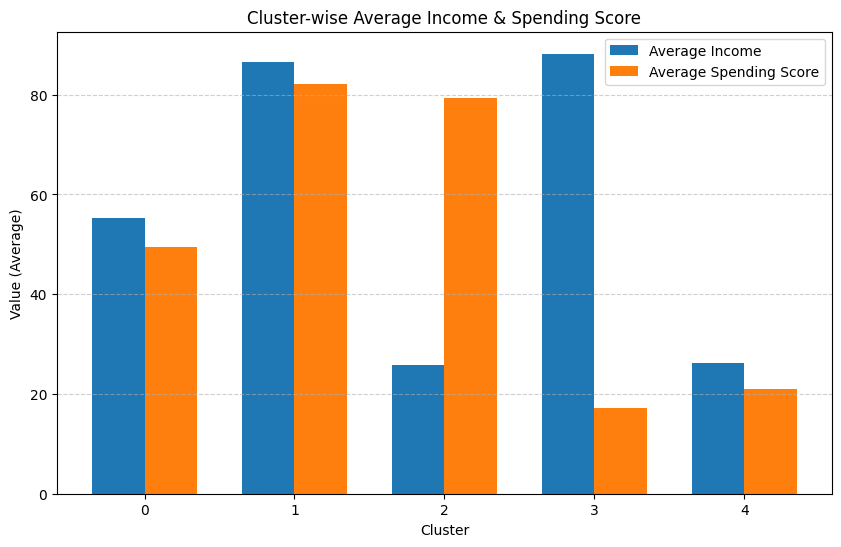

In [ ]:
# BarChart
clusters = final_report.index
income = final_report['Annual Income (k$)']
spending = final_report['Spending Score (1-100)']

bar_width = 0.35
x = np.arange(len(clusters))

plt.figure(figsize=(10, 6))

plt.bar(x - bar_width/2, income, bar_width, label='Average Income')
plt.bar(x + bar_width/2, spending, bar_width, label='Average Spending Score')


plt.xlabel('Cluster')
plt.ylabel('Value (Average)')
plt.title('Cluster-wise Average Income & Spending Score')
plt.xticks(x, clusters)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

In [ ]:
# Average Age
cluster_analysis = df.groupby('Cluster')[['Age']].mean().round(2)
print(cluster_analysis)

           Age
Cluster       
0        42.72
1        32.69
2        25.27
3        41.11
4        45.22


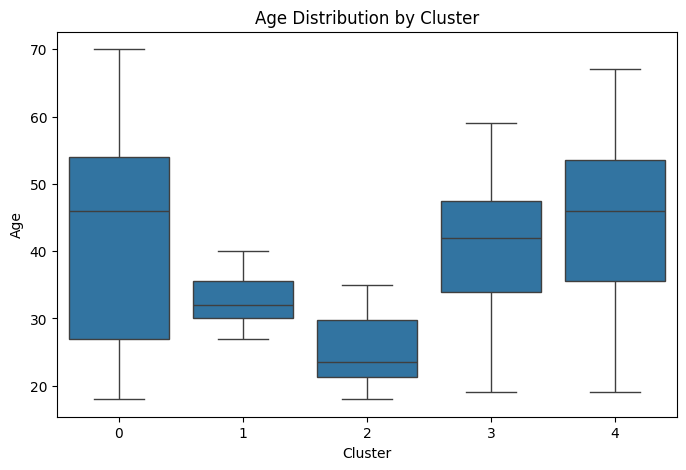

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cluster', y='Age', data=df)
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

In [ ]:
cluster_gender = df.groupby(['Cluster','Gender']).size().unstack(fill_value=0)
print(cluster_gender)

Gender   Female  Male
Cluster              
0            48    33
1            21    18
2            13     9
3            16    19
4            14     9


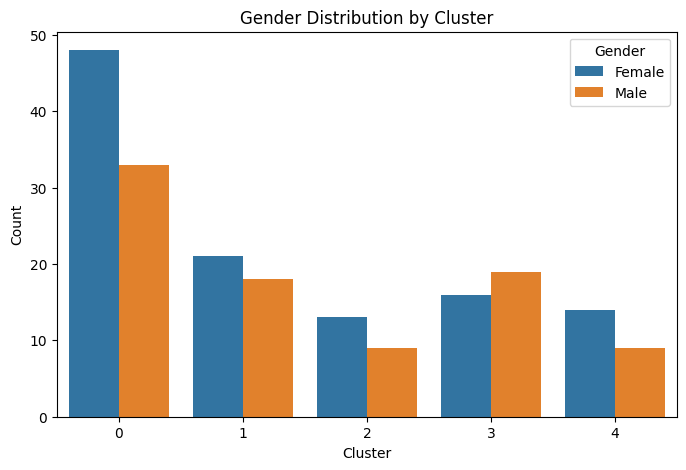

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', hue='Gender', data=df)
plt.title('Gender Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

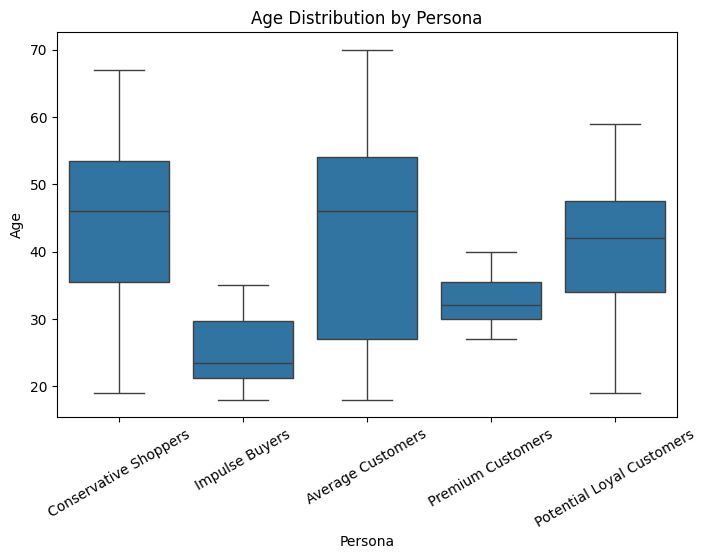

In [ ]:
df['Persona'] = df['Cluster'].map(final_report['Persona'])

plt.figure(figsize=(8, 5))
sns.boxplot(x='Persona', y='Age', data=df)
plt.title('Age Distribution by Persona')
plt.xlabel('Persona')
plt.ylabel('Age')
plt.xticks(rotation=30)
plt.show()
